[The Interview Attendance Problem Predict which candidates will attend the intervew](https://www.kaggle.com/vishnusraghavan/the-interview-attendance-problem)

In [115]:
from IPython.core.display import display, HTML
display(HTML('<div class="ColumnColumn-cZxHrB dxWjkJ"><div class="Container-bkwaYr fAIQzm"><div class="Header-gqdeZc gTibGA"><div class="HeaderTitle-fjCcJr ipvKYs">Columns</div><div class="HeaderRight-eFYUTh ebdfbf"></div></div><div class="Content-hrqCnv ksJdjj"><div class="Column-gScBqE eJLbZU"><div class="ColumnType-bbFDPm huoxTp"><div class="ToolTipContainer-hSgWys EMYei"><span class="ColumnTypeIcon-fUBsKV gwQVZl fa fa-font" name="font" data-tip="true" data-for="tooltip_112" currentitem="false"></span><div class="__react_component_tooltip place-top type-dark " data-id="tooltip" style="left: 599px; top: 198px;"><div class="ToolTipView-kjKEhc dpxOUJ">String</div></div></div></div><div class="ColumnMain-bgXbhl ksVhPD"><span class="ColumnName-dOLbet kAZpuy">Date of Interview</span><span class="ColumnDescription-meJpw fhNwuk"><div class="markdown-converter__text--rendered"><p>This date refers to the day the candidates were scheduled for the interview. The formats vary.</p></div></span></div></div><div class="Column-gScBqE eJLbZU"><div class="ColumnType-bbFDPm huoxTp"><div class="ToolTipContainer-hSgWys EMYei"><span class="ColumnTypeIcon-fUBsKV gwQVZl fa fa-font" name="font" data-tip="true" data-for="tooltip_113" currentitem="false"></span><div class="__react_component_tooltip place-top type-dark " data-id="tooltip"></div></div></div><div class="ColumnMain-bgXbhl ksVhPD"><span class="ColumnName-dOLbet kAZpuy">Client name</span><span class="ColumnDescription-meJpw fhNwuk"><div class="markdown-converter__text--rendered"><p>The clients that gave the recruitment vendor the requisite mandate</p></div></span></div></div><div class="Column-gScBqE eJLbZU"><div class="ColumnType-bbFDPm huoxTp"><div class="ToolTipContainer-hSgWys EMYei"><span class="ColumnTypeIcon-fUBsKV gwQVZl fa fa-font" name="font" data-tip="true" data-for="tooltip_114" currentitem="false"></span><div class="__react_component_tooltip place-top type-dark " data-id="tooltip"></div></div></div><div class="ColumnMain-bgXbhl ksVhPD"><span class="ColumnName-dOLbet kAZpuy">Industry</span><span class="ColumnDescription-meJpw fhNwuk"><div class="markdown-converter__text--rendered"><p>This refers to the vertical the client belongs(Note Candidates can jump across verticals in their job hunt)</p></div></span></div></div><div class="Column-gScBqE eJLbZU"><div class="ColumnType-bbFDPm huoxTp"><div class="ToolTipContainer-hSgWys EMYei"><span class="ColumnTypeIcon-fUBsKV gwQVZl fa fa-font" name="font" data-tip="true" data-for="tooltip_115" currentitem="false"></span><div class="__react_component_tooltip place-top type-dark " data-id="tooltip"></div></div></div><div class="ColumnMain-bgXbhl ksVhPD"><span class="ColumnName-dOLbet kAZpuy">Location</span><span class="ColumnDescription-meJpw fhNwuk"><div class="markdown-converter__text--rendered"><p>Refers to the current location of the candidate</p></div></span></div></div><div class="Column-gScBqE eJLbZU"><div class="ColumnType-bbFDPm huoxTp"><div class="ToolTipContainer-hSgWys EMYei"><span class="ColumnTypeIcon-fUBsKV gwQVZl fa fa-font" name="font" data-tip="true" data-for="tooltip_116" currentitem="false"></span><div class="__react_component_tooltip place-top type-dark " data-id="tooltip"></div></div></div><div class="ColumnMain-bgXbhl ksVhPD"><span class="ColumnName-dOLbet kAZpuy">Position to be closed</span><span class="ColumnDescription-meJpw fhNwuk"><div class="markdown-converter__text--rendered"><p>Niche refers to rare skill sets while routine refers to more common skill sets</p></div></span></div></div><div class="Column-gScBqE eJLbZU"><div class="ColumnType-bbFDPm huoxTp"><div class="ToolTipContainer-hSgWys EMYei"><span class="ColumnTypeIcon-fUBsKV gwQVZl fa fa-font" name="font" data-tip="true" data-for="tooltip_117" currentitem="false"></span><div class="__react_component_tooltip place-top type-dark " data-id="tooltip"></div></div></div><div class="ColumnMain-bgXbhl ksVhPD"><span class="ColumnName-dOLbet kAZpuy">Nature of Skillset</span><span class="ColumnDescription-meJpw fhNwuk"><div class="markdown-converter__text--rendered"><p>This refers to the skill the client has and specifies the same</p></div></span></div></div><div class="Column-gScBqE eJLbZU"><div class="ColumnType-bbFDPm huoxTp"><div class="ToolTipContainer-hSgWys EMYei"><span class="ColumnTypeIcon-fUBsKV gwQVZl fa fa-font" name="font" data-tip="true" data-for="tooltip_118" currentitem="false"></span><div class="__react_component_tooltip place-top type-dark " data-id="tooltip"></div></div></div><div class="ColumnMain-bgXbhl ksVhPD"><span class="ColumnName-dOLbet kAZpuy">Interview Type</span><span class="ColumnDescription-meJpw fhNwuk"><div class="markdown-converter__text--rendered"><p>There are three types of interview- Walkin drives- these are unscheduled. Candidates are either contacted or they come to the interview on their own volition, Scheduled- Here the candidates profiles are screened by the client and subsequent to this, the vendor fixes an appointment between the client and the candidate. The third one is a scheduled walkin. Here the number of candidates is larger and the candidates are informed beforehand of a tentative date to ascertain their availability. The profiles are screened as in a scheduled interview. In a sense it bears features of both a walk-in and a scheduled interview</p></div></span></div></div><div class="Column-gScBqE eJLbZU"><div class="ColumnType-bbFDPm huoxTp"><div class="ToolTipContainer-hSgWys EMYei"><span class="ColumnTypeIcon-fUBsKV gwQVZl fa fa-font" name="font" data-tip="true" data-for="tooltip_119" currentitem="false"></span><div class="__react_component_tooltip place-top type-dark " data-id="tooltip"></div></div></div><div class="ColumnMain-bgXbhl ksVhPD"><span class="ColumnName-dOLbet kAZpuy">Name(Cand ID)</span><span class="ColumnDescription-meJpw fhNwuk"><div class="markdown-converter__text--rendered"><p>This is a substitute to keep the candidates identity a secret</p></div></span></div></div><div class="Column-gScBqE eJLbZU"><div class="ColumnType-bbFDPm huoxTp"><div class="ToolTipContainer-hSgWys EMYei"><span class="ColumnTypeIcon-fUBsKV gwQVZl fa fa-font" name="font" data-tip="true" data-for="tooltip_120" currentitem="false"></span><div class="__react_component_tooltip place-top type-dark " data-id="tooltip"></div></div></div><div class="ColumnMain-bgXbhl ksVhPD"><span class="ColumnName-dOLbet kAZpuy">Gender</span><span class="ColumnDescription-meJpw fhNwuk"><div class="markdown-converter__text--rendered"><p>Whether the candidate is male or female</p></div></span></div></div><div class="Column-gScBqE eJLbZU"><div class="ColumnType-bbFDPm huoxTp"><div class="ToolTipContainer-hSgWys EMYei"><span class="ColumnTypeIcon-fUBsKV gwQVZl fa fa-font" name="font" data-tip="true" data-for="tooltip_121" currentitem="false"></span><div class="__react_component_tooltip place-top type-dark " data-id="tooltip"></div></div></div><div class="ColumnMain-bgXbhl ksVhPD"><span class="ColumnName-dOLbet kAZpuy">Candidate Current Location</span></div></div><div class="Column-gScBqE eJLbZU"><div class="ColumnType-bbFDPm huoxTp"><div class="ToolTipContainer-hSgWys EMYei"><span class="ColumnTypeIcon-fUBsKV gwQVZl fa fa-font" name="font" data-tip="true" data-for="tooltip_122" currentitem="false"></span><div class="__react_component_tooltip place-top type-dark " data-id="tooltip"></div></div></div><div class="ColumnMain-bgXbhl ksVhPD"><span class="ColumnName-dOLbet kAZpuy">Candidate Job Location</span></div></div><div class="Column-gScBqE eJLbZU"><div class="ColumnType-bbFDPm huoxTp"><div class="ToolTipContainer-hSgWys EMYei"><span class="ColumnTypeIcon-fUBsKV gwQVZl fa fa-font" name="font" data-tip="true" data-for="tooltip_123" currentitem="false"></span><div class="__react_component_tooltip place-top type-dark " data-id="tooltip"></div></div></div><div class="ColumnMain-bgXbhl ksVhPD"><span class="ColumnName-dOLbet kAZpuy">Interview Venue</span></div></div><div class="Column-gScBqE eJLbZU"><div class="ColumnType-bbFDPm huoxTp"><div class="ToolTipContainer-hSgWys EMYei"><span class="ColumnTypeIcon-fUBsKV gwQVZl fa fa-font" name="font" data-tip="true" data-for="tooltip_124" currentitem="false"></span><div class="__react_component_tooltip place-top type-dark " data-id="tooltip"></div></div></div><div class="ColumnMain-bgXbhl ksVhPD"><span class="ColumnName-dOLbet kAZpuy">Candidate Native location</span></div></div><div class="Column-gScBqE eJLbZU"><div class="ColumnType-bbFDPm huoxTp"><div class="ToolTipContainer-hSgWys EMYei"><span class="ColumnTypeIcon-fUBsKV gwQVZl fa fa-font" name="font" data-tip="true" data-for="tooltip_125" currentitem="false"></span><div class="__react_component_tooltip place-top type-dark " data-id="tooltip"></div></div></div><div class="ColumnMain-bgXbhl ksVhPD"><span class="ColumnName-dOLbet kAZpuy">Have you obtained the necessary permission to start at the required time</span></div></div><div class="Column-gScBqE eJLbZU"><div class="ColumnType-bbFDPm huoxTp"><div class="ToolTipContainer-hSgWys EMYei"><span class="ColumnTypeIcon-fUBsKV gwQVZl fa fa-font" name="font" data-tip="true" data-for="tooltip_126" currentitem="false"></span><div class="__react_component_tooltip place-top type-dark " data-id="tooltip"></div></div></div><div class="ColumnMain-bgXbhl ksVhPD"><span class="ColumnName-dOLbet kAZpuy">Hope there will be no unscheduled meetings</span></div></div><div class="Column-gScBqE eJLbZU"><div class="ColumnType-bbFDPm huoxTp"><div class="ToolTipContainer-hSgWys EMYei"><span class="ColumnTypeIcon-fUBsKV gwQVZl fa fa-font" name="font" data-tip="true" data-for="tooltip_127" currentitem="false"></span><div class="__react_component_tooltip place-top type-dark " data-id="tooltip"></div></div></div><div class="ColumnMain-bgXbhl ksVhPD"><span class="ColumnName-dOLbet kAZpuy">Can I Call you three hours before the interview and follow up on your attendance for the interview</span></div></div><div class="Column-gScBqE eJLbZU"><div class="ColumnType-bbFDPm huoxTp"><div class="ToolTipContainer-hSgWys EMYei"><span class="ColumnTypeIcon-fUBsKV gwQVZl fa fa-font" name="font" data-tip="true" data-for="tooltip_128" currentitem="false"></span><div class="__react_component_tooltip place-top type-dark " data-id="tooltip"></div></div></div><div class="ColumnMain-bgXbhl ksVhPD"><span class="ColumnName-dOLbet kAZpuy">Can I have an alternative number/ desk number. I assure you that I will not trouble you too much</span></div></div><div class="Column-gScBqE eJLbZU"><div class="ColumnType-bbFDPm huoxTp"><div class="ToolTipContainer-hSgWys EMYei"><span class="ColumnTypeIcon-fUBsKV gwQVZl fa fa-font" name="font" data-tip="true" data-for="tooltip_129" currentitem="false"></span><div class="__react_component_tooltip place-top type-dark " data-id="tooltip"></div></div></div><div class="ColumnMain-bgXbhl ksVhPD"><span class="ColumnName-dOLbet kAZpuy">Have you taken a printout of your updated resume. Have you read the JD and understood the same</span></div></div><div class="Column-gScBqE eJLbZU"><div class="ColumnType-bbFDPm huoxTp"><div class="ToolTipContainer-hSgWys EMYei"><span class="ColumnTypeIcon-fUBsKV gwQVZl fa fa-font" name="font" data-tip="true" data-for="tooltip_130" currentitem="false"></span><div class="__react_component_tooltip place-top type-dark " data-id="tooltip"></div></div></div><div class="ColumnMain-bgXbhl ksVhPD"><span class="ColumnName-dOLbet kAZpuy">Are you clear with the venue details and the landmark.</span></div></div><div class="Column-gScBqE eJLbZU"><div class="ColumnType-bbFDPm huoxTp"><div class="ToolTipContainer-hSgWys EMYei"><span class="ColumnTypeIcon-fUBsKV gwQVZl fa fa-font" name="font" data-tip="true" data-for="tooltip_131" currentitem="false"></span><div class="__react_component_tooltip place-top type-dark " data-id="tooltip"></div></div></div><div class="ColumnMain-bgXbhl ksVhPD"><span class="ColumnName-dOLbet kAZpuy">Has the call letter been shared</span></div></div><div class="Column-gScBqE eJLbZU"><div class="ColumnType-bbFDPm huoxTp"><div class="ToolTipContainer-hSgWys EMYei"><span class="ColumnTypeIcon-fUBsKV gwQVZl fa fa-font" name="font" data-tip="true" data-for="tooltip_132" currentitem="false"></span><div class="__react_component_tooltip place-top type-dark " data-id="tooltip"></div></div></div><div class="ColumnMain-bgXbhl ksVhPD"><span class="ColumnName-dOLbet kAZpuy">Expected Attendance</span><span class="ColumnDescription-meJpw fhNwuk"><div class="markdown-converter__text--rendered"><p>Whether the candidate was expected to attend the interview. Here the it is either yes no or uncertain</p></div></span></div></div><div class="Column-gScBqE eJLbZU"><div class="ColumnType-bbFDPm huoxTp"><div class="ToolTipContainer-hSgWys EMYei"><span class="ColumnTypeIcon-fUBsKV gwQVZl fa fa-font" name="font" data-tip="true" data-for="tooltip_133" currentitem="false"></span><div class="__react_component_tooltip place-top type-dark " data-id="tooltip"></div></div></div><div class="ColumnMain-bgXbhl ksVhPD"><span class="ColumnName-dOLbet kAZpuy">Observed Attendance</span><span class="ColumnDescription-meJpw fhNwuk"><div class="markdown-converter__text--rendered"><p>Whether the candidate attended the interview. This is binary and will form our dependent variable</p></div></span></div></div><div class="Column-gScBqE eJLbZU"><div class="ColumnType-bbFDPm huoxTp"><div class="ToolTipContainer-hSgWys EMYei"><span class="ColumnTypeIcon-fUBsKV gwQVZl fa fa-font" name="font" data-tip="true" data-for="tooltip_134" currentitem="false"></span><div class="__react_component_tooltip place-top type-dark " data-id="tooltip"></div></div></div><div class="ColumnMain-bgXbhl ksVhPD"><span class="ColumnName-dOLbet kAZpuy">Marital Status</span><span class="ColumnDescription-meJpw fhNwuk"><div class="markdown-converter__text--rendered"><p>Whether the candidate is married or Single</p></div></span></div></div><div class="Column-gScBqE eJLbZU"><div class="ColumnType-bbFDPm huoxTp"><div class="ToolTipContainer-hSgWys EMYei"><span class="ColumnTypeIcon-fUBsKV gwQVZl fa fa-font" name="font" data-tip="true" data-for="tooltip_135" currentitem="false"></span><div class="__react_component_tooltip place-top type-dark " data-id="tooltip"></div></div></div><div class="ColumnMain-bgXbhl ksVhPD"><span class="ColumnName-dOLbet kAZpuy"></span></div></div><div class="Column-gScBqE eJLbZU"><div class="ColumnType-bbFDPm huoxTp"><div class="ToolTipContainer-hSgWys EMYei"><span class="ColumnTypeIcon-fUBsKV gwQVZl fa fa-font" name="font" data-tip="true" data-for="tooltip_136" currentitem="false"></span><div class="__react_component_tooltip place-top type-dark " data-id="tooltip"></div></div></div><div class="ColumnMain-bgXbhl ksVhPD"><span class="ColumnName-dOLbet kAZpuy"></span></div></div><div class="Column-gScBqE eJLbZU"><div class="ColumnType-bbFDPm huoxTp"><div class="ToolTipContainer-hSgWys EMYei"><span class="ColumnTypeIcon-fUBsKV gwQVZl fa fa-font" name="font" data-tip="true" data-for="tooltip_137" currentitem="false"></span><div class="__react_component_tooltip place-top type-dark " data-id="tooltip"></div></div></div><div class="ColumnMain-bgXbhl ksVhPD"><span class="ColumnName-dOLbet kAZpuy"></span></div></div><div class="Column-gScBqE eJLbZU"><div class="ColumnType-bbFDPm huoxTp"><div class="ToolTipContainer-hSgWys EMYei"><span class="ColumnTypeIcon-fUBsKV gwQVZl fa fa-font" name="font" data-tip="true" data-for="tooltip_138" currentitem="false"></span><div class="__react_component_tooltip place-top type-dark " data-id="tooltip"></div></div></div><div class="ColumnMain-bgXbhl ksVhPD"><span class="ColumnName-dOLbet kAZpuy"></span></div></div><div class="Column-gScBqE eJLbZU"><div class="ColumnType-bbFDPm huoxTp"><div class="ToolTipContainer-hSgWys EMYei"><span class="ColumnTypeIcon-fUBsKV gwQVZl fa fa-font" name="font" data-tip="true" data-for="tooltip_139" currentitem="false"></span><div class="__react_component_tooltip place-top type-dark " data-id="tooltip"></div></div></div><div class="ColumnMain-bgXbhl ksVhPD"><span class="ColumnName-dOLbet kAZpuy"></span></div></div></div></div></div>'))

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import statsmodels.api as sm
import scipy.stats as scs
from statsmodels.stats.outliers_influence import variance_inflation_factor

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier 
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.features.importances import FeatureImportances

In [2]:
iview = pd.read_csv('Interview.csv')
iview.head()

,Date of Interview,Client name,Industry,Location,Position to be closed,Nature of Skillset,Interview Type,Name(Cand ID),Gender,Candidate Current Location,...,Are you clear with the venue details and the landmark.,Has the call letter been shared,Expected Attendance,Observed Attendance,Marital Status,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 1,Male,Chennai,...,Yes,Yes,Yes,No,Single,NaN,NaN,NaN,NaN,NaN
1,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 2,Male,Chennai,...,Yes,Yes,Yes,No,Single,NaN,NaN,NaN,NaN,NaN
2,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 3,Male,Chennai,...,NaN,NaN,Uncertain,No,Single,NaN,NaN,NaN,NaN,NaN
3,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 4,Male,Chennai,...,Yes,Yes,Uncertain,No,Single,NaN,NaN,NaN,NaN,NaN
4,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 5,Male,Chennai,...,Yes,Yes,Uncertain,No,Married,NaN,NaN,NaN,NaN,NaN


In [3]:
iview.shape

(1234, 28)

In [4]:
iview.columns

Index(['Date of Interview', 'Client name', 'Industry', 'Location',
       'Position to be closed', 'Nature of Skillset', 'Interview Type',
       'Name(Cand ID)', 'Gender', 'Candidate Current Location',
       'Candidate Job Location', 'Interview Venue',
       'Candidate Native location',
       'Have you obtained the necessary permission to start at the required time',
       'Hope there will be no unscheduled meetings',
       'Can I Call you three hours before the interview and follow up on your attendance for the interview',
       'Can I have an alternative number/ desk number. I assure you that I will not trouble you too much',
       'Have you taken a printout of your updated resume. Have you read the JD and understood the same',
       'Are you clear with the venue details and the landmark.',
       'Has the call letter been shared', 'Expected Attendance',
       'Observed Attendance', 'Marital Status', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25', 'Unnamed: 26', 'Unname

In [5]:
iview.isnull().sum()

Date of Interview                                                                                        1
Client name                                                                                              0
Industry                                                                                                 1
Location                                                                                                 1
Position to be closed                                                                                    1
Nature of Skillset                                                                                       1
Interview Type                                                                                           1
Name(Cand ID)                                                                                            1
Gender                                                                                                   1
Candidate Current Location           

In [6]:
iview = iview.drop(['Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27'],axis = 1)

In [7]:
iview[iview['Date of Interview'].isna() == True]

,Date of Interview,Client name,Industry,Location,Position to be closed,Nature of Skillset,Interview Type,Name(Cand ID),Gender,Candidate Current Location,...,Have you obtained the necessary permission to start at the required time,Hope there will be no unscheduled meetings,Can I Call you three hours before the interview and follow up on your attendance for the interview,Can I have an alternative number/ desk number. I assure you that I will not trouble you too much,Have you taken a printout of your updated resume. Have you read the JD and understood the same,Are you clear with the venue details and the landmark.,Has the call letter been shared,Expected Attendance,Observed Attendance,Marital Status
1233,NaN,﻿﻿,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
iview = iview.drop(1233, axis = 0)

In [9]:
iview2 = iview[['Industry',
       'Position to be closed', 'Interview Type','Gender','Interview Venue',
       'Have you obtained the necessary permission to start at the required time',
       'Hope there will be no unscheduled meetings',
       'Can I Call you three hours before the interview and follow up on your attendance for the interview',
       'Can I have an alternative number/ desk number. I assure you that I will not trouble you too much',
       'Have you taken a printout of your updated resume. Have you read the JD and understood the same',
       'Are you clear with the venue details and the landmark.',
       'Has the call letter been shared', 'Expected Attendance',
       'Observed Attendance', 'Marital Status']]

In [10]:
def func():
    
    for i in iview2.columns:
        print(np.unique(pd.DataFrame(iview2[i].value_counts()).reset_index()['index']).tolist())
        #print(uni)

In [11]:
func()

['BFSI', 'Electronics', 'IT', 'IT Products and Services', 'IT Services', 'Pharmaceuticals', 'Telecom']
['AML', 'Dot Net', 'Niche', 'Production- Sterile', 'Routine', 'Selenium testing', 'Trade Finance']
['Sceduled walkin', 'Scheduled ', 'Scheduled Walk In', 'Scheduled Walkin', 'Walkin', 'Walkin ']
['Female', 'Male']
['- Cochin- ', 'Bangalore', 'Chennai', 'Gurgaon', 'Hosur', 'Hyderabad', 'Noida']
['NO', 'Na', 'No', 'Not yet', 'Yes', 'Yet to confirm', 'yes']
['Na', 'No', 'Not Sure', 'Not sure', 'Yes', 'cant Say', 'yes']
['Na', 'No', 'No Dont', 'Yes', 'yes']
['Na', 'No', 'No I have only thi number', 'Yes', 'na', 'yes']
['Na', 'No', 'No- will take it soon', 'Not Yet', 'Not yet', 'Yes', 'na', 'yes']
['Na', 'No', 'No- I need to check', 'Yes', 'na', 'no', 'yes']
['Havent Checked', 'Na', 'Need To Check', 'No', 'Not Sure', 'Not sure', 'Not yet', 'Yes', 'Yet to Check', 'na', 'no', 'yes']
['10.30 Am', '11:00 AM', 'NO', 'No', 'Uncertain', 'Yes', 'yes']
['NO', 'No', 'No ', 'Yes', 'no', 'no ', 'yes',

In [12]:
iview2 = iview2.replace(['Sceduled walkin', 'Scheduled Walk In', 'Scheduled Walkin', 'Walkin', 'Walkin '], 'Walk-in')
iview2 = iview2.replace(['Scheduled '], 'Scheduled')
iview2 = iview2.replace(['Yes', 'yes', 'yes ', 'YES', ' yes', 'Y','10.30 Am', '11:00 AM'], 'y')
iview2 = iview2.replace(['No', 'no', 'no ', 'NO', ' no', 'N', 'Na','na','No I have only thi number',
                        'No- will take it soon', 'n','Havent Checked','No ','No Dont','Not Yet'], 'n')
iview2 = iview2.replace(['Havent Checked', 'Need To Check', 'Not Sure', 'Not sure', 'Not yet', 'Yet to Check', 
                         'Yet to confirm','cant Say','No- I need to check'], 'Uncertain')
iview2 = iview2.replace(['IT Products and Services', 'IT Services'], 'IT')

In [13]:
def func():
    
    for i in iview2.columns:
        print(np.unique(pd.DataFrame(iview2[i].value_counts()).reset_index()['index']).tolist())
        #print(uni)

In [14]:
func()

['BFSI', 'Electronics', 'IT', 'Pharmaceuticals', 'Telecom']
['AML', 'Dot Net', 'Niche', 'Production- Sterile', 'Routine', 'Selenium testing', 'Trade Finance']
['Scheduled', 'Walk-in']
['Female', 'Male']
['- Cochin- ', 'Bangalore', 'Chennai', 'Gurgaon', 'Hosur', 'Hyderabad', 'Noida']
['Uncertain', 'n', 'y']
['Uncertain', 'n', 'y']
['n', 'y']
['n', 'y']
['Uncertain', 'n', 'y']
['Uncertain', 'n', 'y']
['Uncertain', 'n', 'y']
['Uncertain', 'n', 'y']
['n', 'y']
['Married', 'Single']


In [15]:
iview2.columns

Index(['Industry', 'Position to be closed', 'Interview Type', 'Gender',
       'Interview Venue',
       'Have you obtained the necessary permission to start at the required time',
       'Hope there will be no unscheduled meetings',
       'Can I Call you three hours before the interview and follow up on your attendance for the interview',
       'Can I have an alternative number/ desk number. I assure you that I will not trouble you too much',
       'Have you taken a printout of your updated resume. Have you read the JD and understood the same',
       'Are you clear with the venue details and the landmark.',
       'Has the call letter been shared', 'Expected Attendance',
       'Observed Attendance', 'Marital Status'],
      dtype='object')

In [16]:
iview2.isnull().sum()

Industry                                                                                                0
Position to be closed                                                                                   0
Interview Type                                                                                          0
Gender                                                                                                  0
Interview Venue                                                                                         0
Have you obtained the necessary permission to start at the required time                              204
Hope there will be no unscheduled meetings                                                            247
Can I Call you three hours before the interview and follow up on your attendance for the interview    247
Can I have an alternative number/ desk number. I assure you that I will not trouble you too much      247
Have you taken a printout of your updated resu

In [17]:
iview2 = iview2.fillna('n')

In [18]:
iview2.isnull().sum().sum()

0

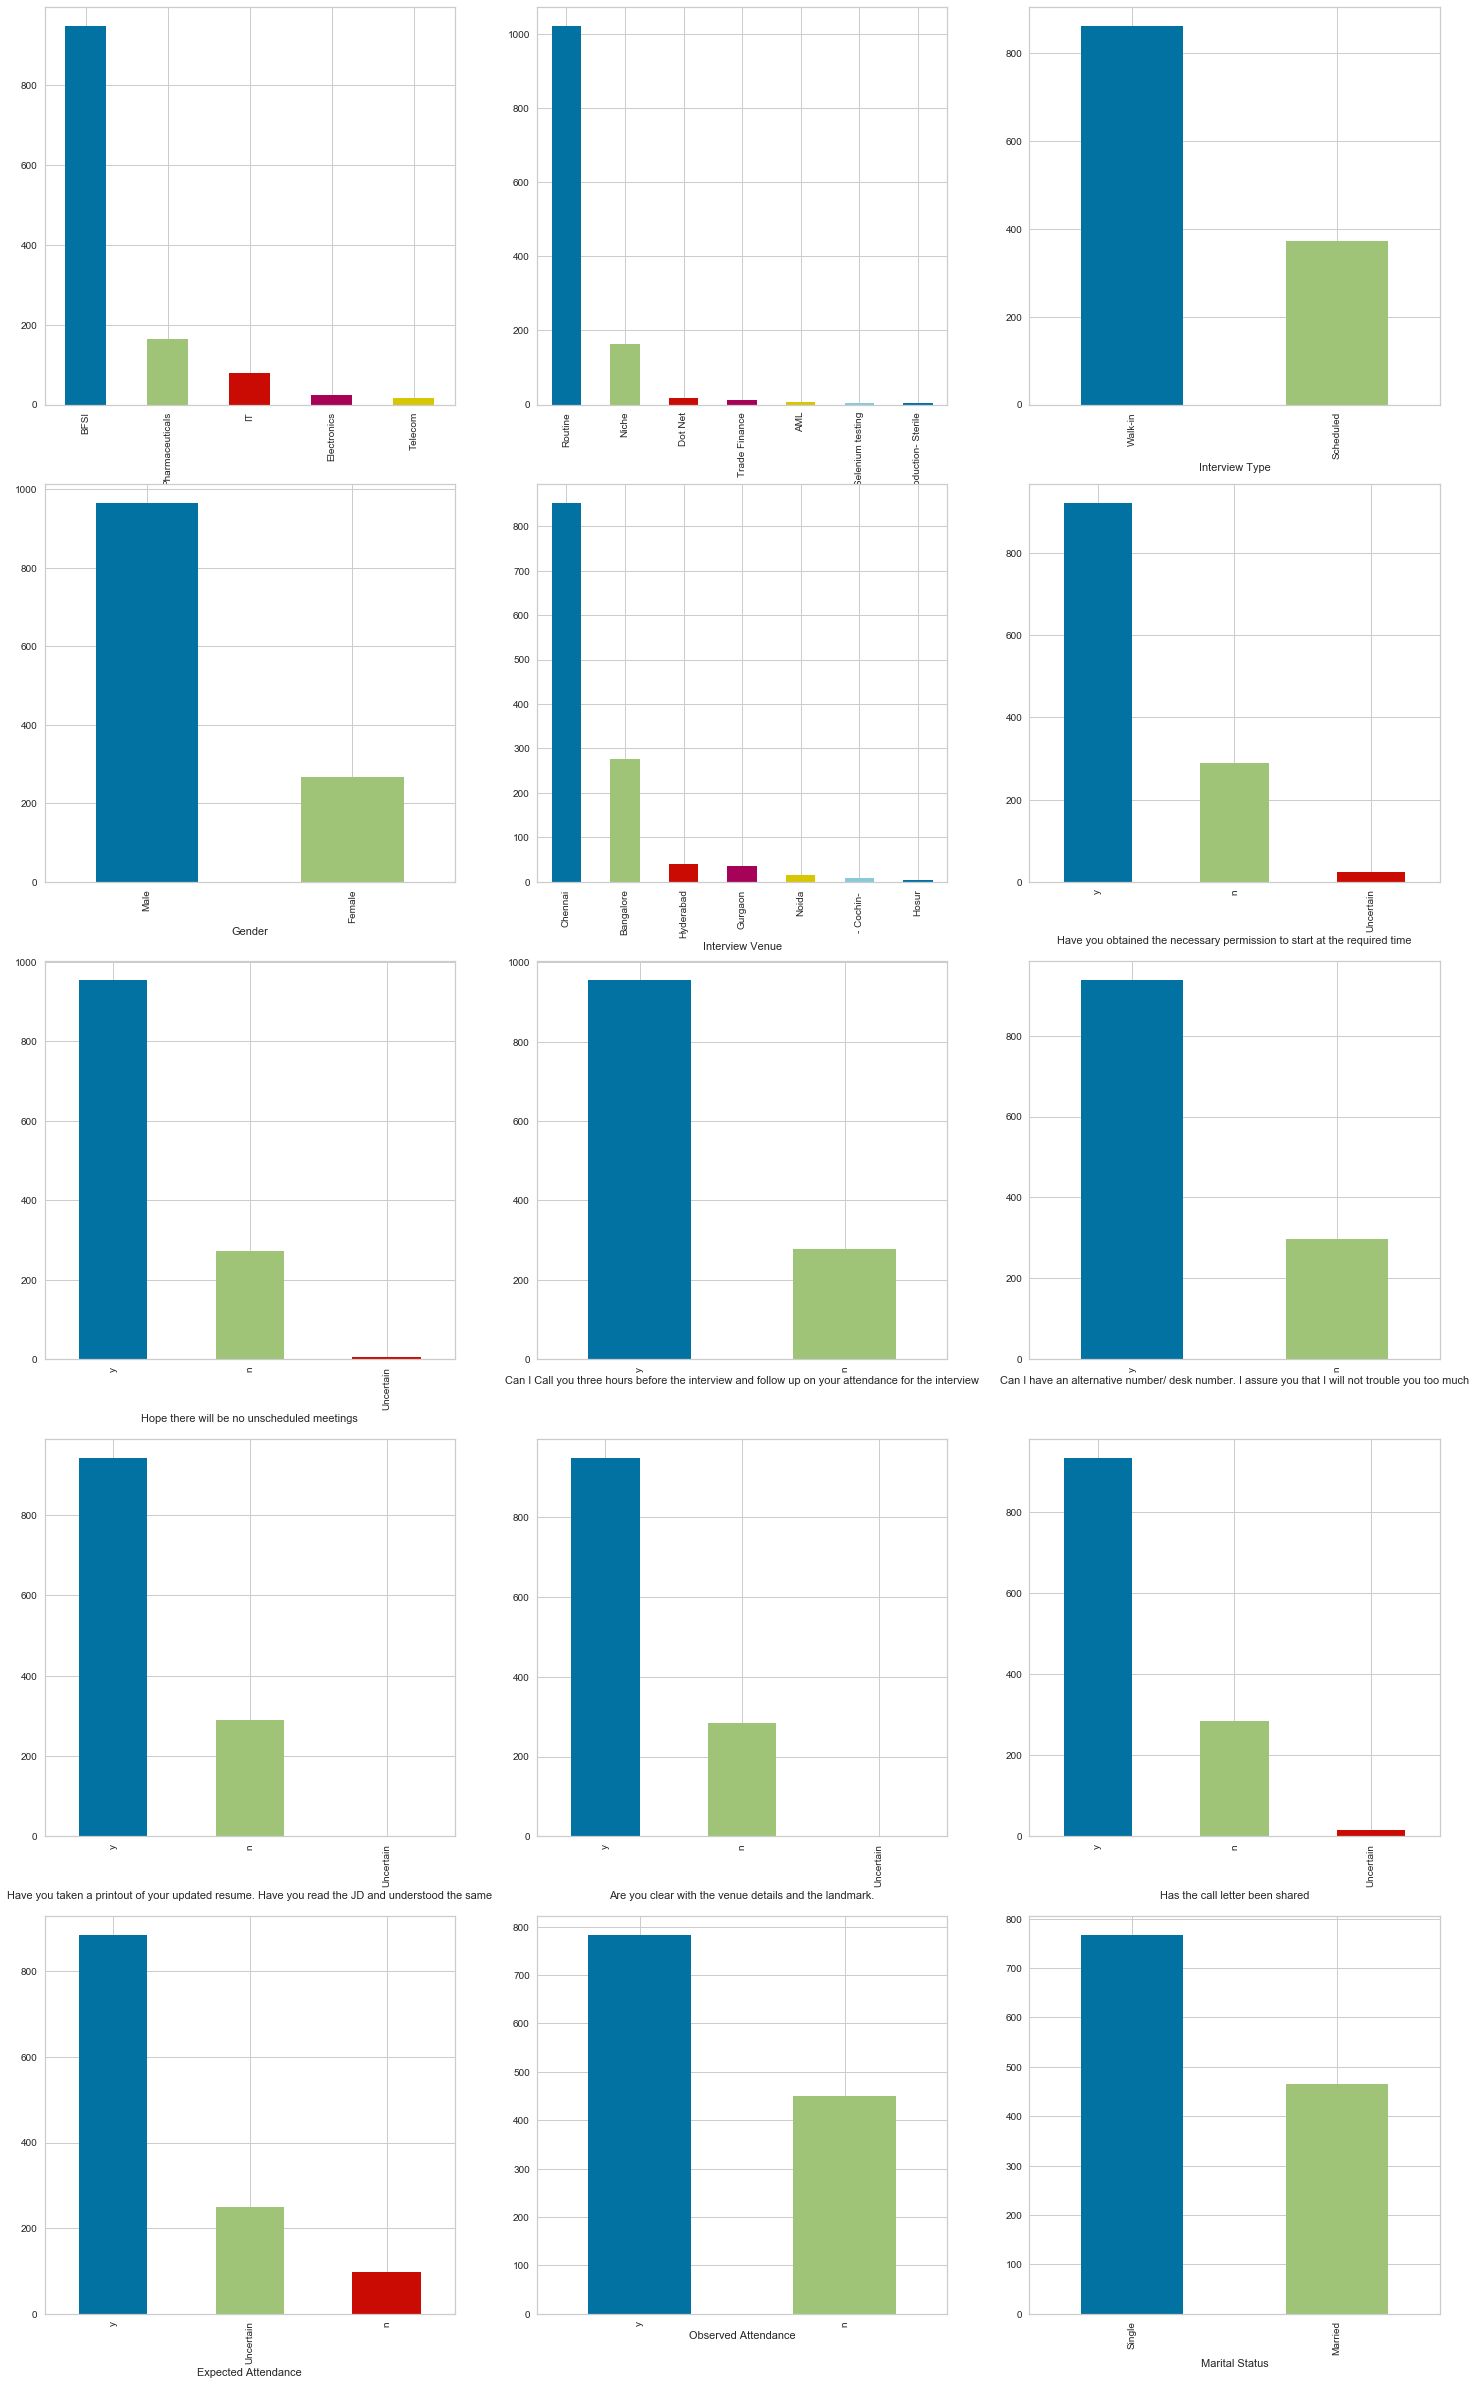

In [19]:
def cat_barplot():
    for n in range(0, (len(iview2.columns))):
        plt.subplot(7, 3, n+1)
        iview2.select_dtypes(include = ['object']).iloc[:,n].value_counts().plot(kind = 'bar')
        plt.xlabel(iview2.select_dtypes(include = ['object']).iloc[:,n].name)
plt.figure(figsize = (25, 60))
cat_barplot()
plt.show()
# Showing the classes in the features (categorical features)

In [20]:
y = pd.DataFrame(iview2.groupby(by = ['Marital Status', 'Observed Attendance'])['Expected Attendance'].count()).reset_index()

In [21]:
y

,Marital Status,Observed Attendance,Expected Attendance
0,Married,n,176
1,Married,y,290
2,Single,n,274
3,Single,y,493


In [33]:
def func1():
    for i in iview2.columns[1:-3]:
        plt.subplot(4, 3, i+1)
        
        y = pd.DataFrame(iview2.groupby(by = [i, 'Observed Attendance'])['Expected Attendance'].count()).reset_index()
        
        sns.barplot(x = i, y = 'Expected Attendance', hue = 'Observed Attendance', data = y)
        plt.show()

In [50]:
def func1():
    for i in range(0, len(iview2.columns[1:-3])):
        plt.subplot(4, 3, i+1)
        
        y = pd.DataFrame(iview2.groupby(by = [iview2.columns[i], 'Observed Attendance'])['Expected Attendance'].count()).reset_index()
        
        sns.barplot(x = iview2.columns[i], y = 'Expected Attendance', hue = 'Observed Attendance', data = y)
        plt.ylabel('Count')

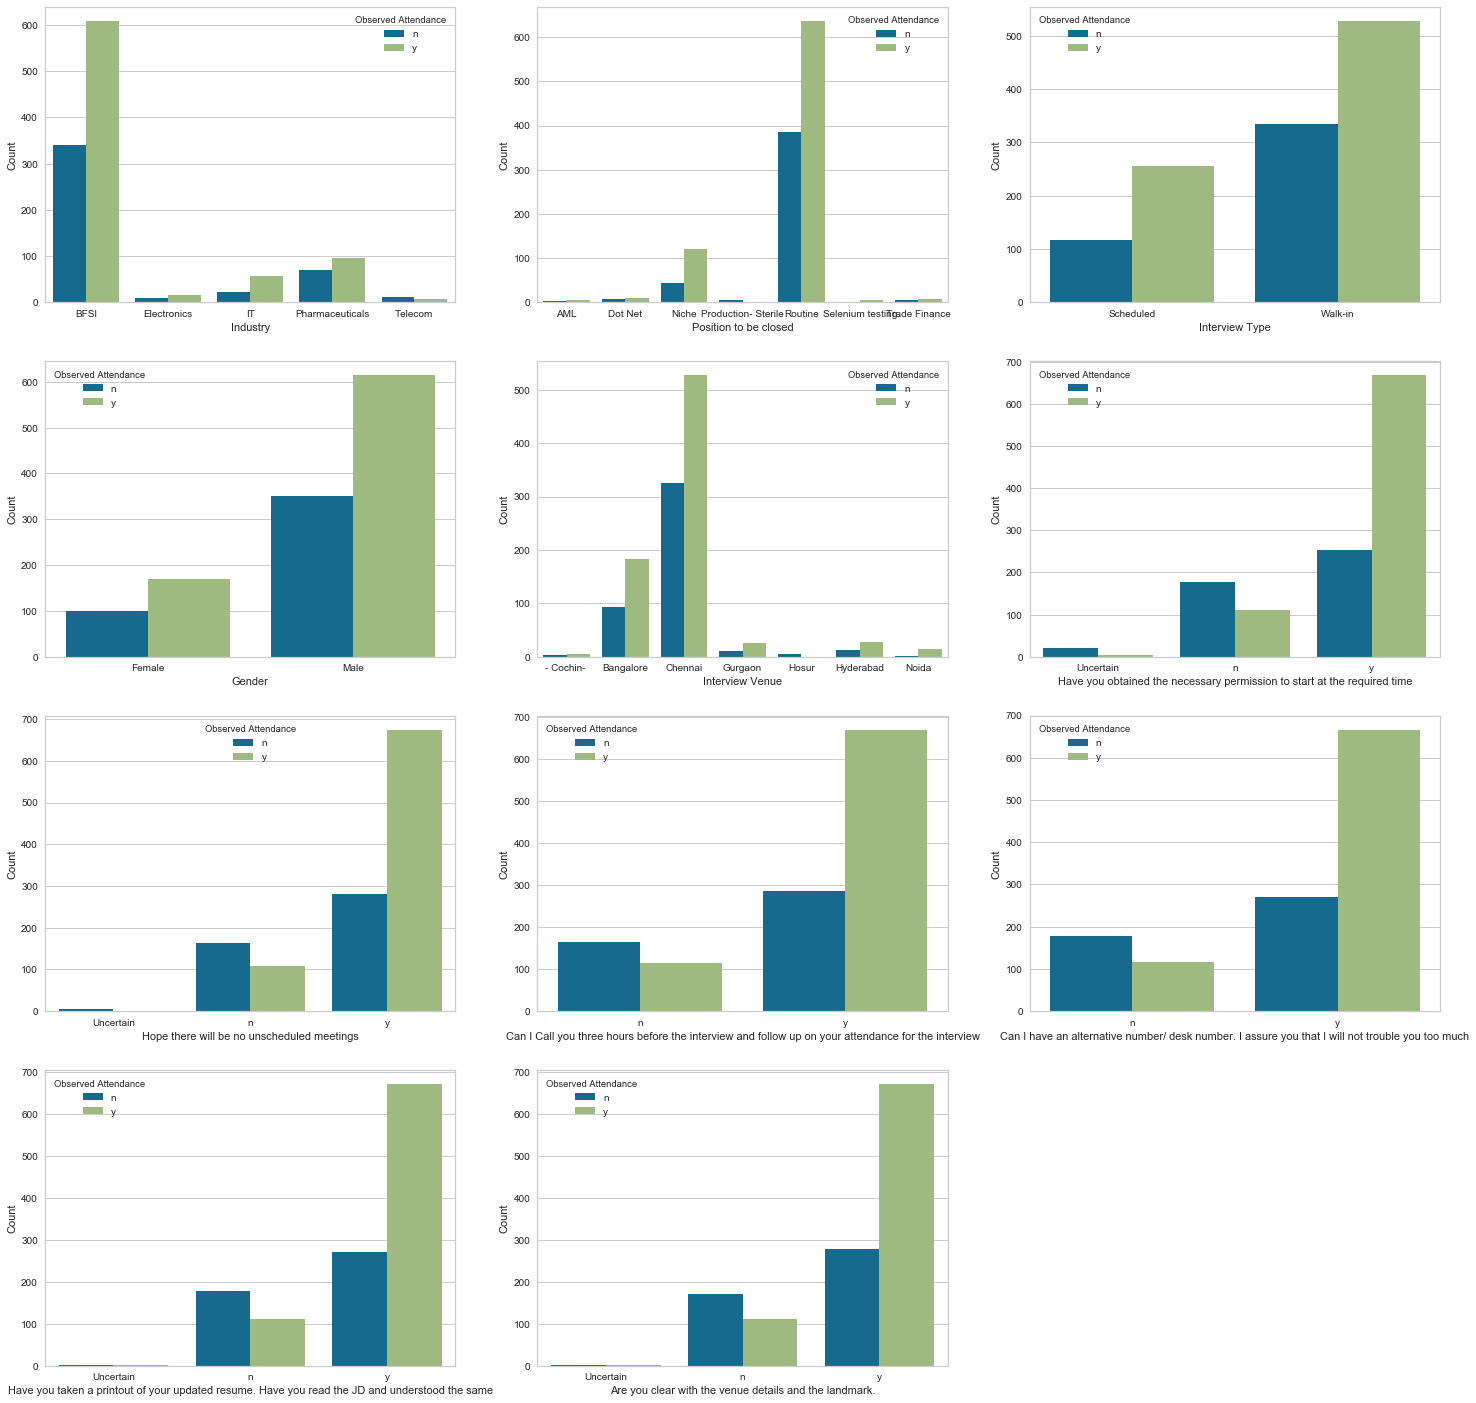

In [52]:
plt.figure(figsize = (25, 25))
func1()
plt.show()

In [26]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
iview3 = iview2.apply(le.fit_transform)

In [27]:
names = ['No', 'Yes']

In [28]:
X = iview3.drop(['Observed Attendance'], axis = 1)
y = iview3['Observed Attendance']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier 
from xgboost import XGBClassifier

from yellowbrick.classifier import ConfusionMatrix

In [31]:
def model_fit(x):
    x.fit(X_train, y_train)
    y_pred = x.predict(X_test)
    model_fit.accuracy = accuracy_score(y_pred, y_test)
    print('Accuracy Score',accuracy_score(y_pred, y_test))
    print(classification_report(y_pred, y_test))
    #print('Confusion Matrix \n',confusion_matrix(y_pred, y_val_c))
    
    classes = names
    
    model_cm = ConfusionMatrix(
    x, classes = classes,
    label_encoder = {0 : 'No', 1 : 'Yes'})
    
    model_cm.fit(X_train, y_train)
    model_cm.score(X_test, y_test)
    
    model_cm.poof()  

Accuracy Score 0.6356275303643725
              precision    recall  f1-score   support

           0       0.69      0.48      0.57       123
           1       0.60      0.79      0.69       124

   micro avg       0.64      0.64      0.64       247
   macro avg       0.65      0.63      0.63       247
weighted avg       0.65      0.64      0.63       247



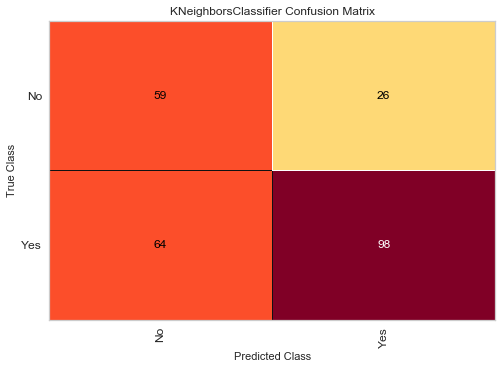

In [32]:
model_fit(KNeighborsClassifier(n_neighbors = 4))
KNN = model_fit.accuracy

In [111]:
from IPython.display import IFrame

IFrame(src='https://www.nytimes.com/2019/01/07/science/exoplanets-tess-nasa.html?action=click&module=Well&pgtype=Homepage&section=Science', width = 700, height = 600)

In [119]:
from bs4 import BeautifulSoup as bs
from urllib.request import urlopen

In [123]:
url = 'https://www.nytimes.com/2019/01/07/science/exoplanets-tess-nasa.html?action=click&module=Well&pgtype=Homepage&section=Science'
page = urlopen(url)
soup = bs(page, 'lxml')

In [ ]:
for i in soup.select('tr.yt-uix-tile')):
    print('{}. {}'.format(i + 1, tr['data-title']))
    print('https://www.youtube.com' + tr.a['href'])
    print('-' * 80)

In [124]:
soup

<!DOCTYPE html>
<html class="story" itemid="https://www.nytimes.com/2019/01/07/science/exoplanets-tess-nasa.html" itemscope="true" itemtype="http://schema.org/NewsArticle" lang="en" xmlns:og="http://opengraphprotocol.org/schema/">
<head>
<title data-rh="true">Another Day, Another Exoplanet: NASA’s TESS Keeps Counting More - The New York Times</title><meta content="en-US" data-rh="true" itemprop="inLanguage"/><meta content="2019-01-07T23:48:51.000Z" data-rh="true" itemprop="datePublished" property="article:published"/><meta content="2019-01-08T17:25:07.435Z" data-rh="true" itemprop="dateModified" property="article:modified"/><meta content="en" data-rh="true" http-equiv="Content-Language"/><meta content="noarchive" data-rh="true" name="robots"/><meta content="100000006294726" data-rh="true" itemprop="identifier" name="articleid"/><meta content="nyt://article/7beb0789-7785-501b-a16a-43b4ca5c5487" data-rh="true" itemprop="identifier" name="nyt_uri"/><meta content="pubp://event/25f68c9de6ae